# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [293]:
# Import the appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


In [201]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [202]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [203]:
# Put your EDA code here
north_df["Rep ID"].describe()

count       245
unique        9
top       Brent
freq         37
Name: Rep ID, dtype: object

In [204]:
south_df["Rep ID"].describe()

count      314
unique      11
top       Eric
freq        35
Name: Rep ID, dtype: object

In [205]:
north_df.mean(numeric_only=True)

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

In [206]:
south_df.mean(numeric_only=True)

Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

In [207]:
north_df['Time Block'].value_counts().sort_index()

10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [208]:
south_df['Time Block'].value_counts().sort_index()

10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!


1. How many reps are in each branch?
        North = 9
        South = 11
        
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

    North
        Busy Minutes Avg = 9.99
        Not Ready Minutes Avg = 1.91
        Incoming Wait Min Avg = 3.04
        During Call Wait Min Avg = 2.97
    South
        Busy Minutes Avg = 10.05
        Not Ready Minutes Avg = 1.91
        Incoming Wait Min Avg = 3.00
        During Call Wait Min Avg = 3.08       
        
3. What is the number of calls taken for each time block?

    North
        9:00 AM      5
        10:00 AM    43
        11:00 AM    25
        12:00 PM    45
        1:00 PM     17
        2:00 PM     35
        3:00 PM     30
        4:00 PM     28
        5:00 PM     17
    South
        9:00 AM      5
        10:00 AM    56
        11:00 AM    31
        12:00 PM    75
        1:00 PM     23
        2:00 PM     30
        3:00 PM     43
        4:00 PM     25
        5:00 PM     26

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [209]:
# Clean your data here
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [210]:
south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [211]:
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [212]:
north_df['Incoming or Outgoing'].value_counts()

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64

In [213]:
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [214]:
south_df['Incoming or Outgoing'].value_counts()

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64

In [215]:
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [216]:
south_df['Sale'].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

In [217]:
north_df['Sale'] = north_df['Sale'].str.strip()

In [218]:
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [219]:
for index, row in enumerate(north_df.duplicated(subset=['Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'])):
    if row == True:
        print (index, row)

50 True
105 True


In [220]:
for index, row in enumerate(south_df.duplicated(subset=['Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'])):
    if row == True:
        print (index, row)

58 True
170 True
180 True


In [221]:
north_df['Queue'].value_counts()

B    149
A     96
Name: Queue, dtype: int64

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? 

Yes. The counts of null/outgoing are the same and a quick glance at the data file confirms it.

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

I fixed the 2 yes problem using a the string strip function to remove any extra white spaces. This will help with any anaylsis that needs to be done on the sales column by keeping the YES answers grouped.

3. Are there duplicates in the two data sets? If there are, how did you handle them?

No rows are duplicated in their entirety. 
I did find some duplicate looking rows after excluding the unnamed index row, however, they aren't numerous enough to be outside the realm of coincidence and the data doesn't specify if it is across mulitiple days, so they were left as is for now.

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

Branch data in each csv is redundant, but if they are later combined, I wouldn't want to lose that. 
I'm not sure if the Queue column is useful, but I might want to compare it against other factors just in case something is fishy with the Queue system, causing longer wait times.
Otherwise, all data seems potentially useful for analysis.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [222]:
# Manipulate data here
df = north_df.append(south_df, ignore_index = True)

In [223]:
df.columns.values[0] = "Row"
df

,Row,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [224]:
Reps = df.groupby(by=["Branch", "Rep ID"]).sum()
Reps

Row  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                               
North  Amanda  0.0          0          1           229                 43   
       Andy    0.0          0          3           228                 43   
       Brent   0.0          0          1           362                 71   
       Cam     0.0          1          0           233                 46   
       Duke    0.0          2          0           292                 56   
       Joe     0.0          0          0           256                 49   
       Lilly   0.0          0          2           307                 59   
       Todd    0.0          1          0           296                 58   
       Xander  0.0          1          0           244                 44   
South  Alice   0.0          0          0           199                 46   
       Eric    0.0          0          0           361                 54   
       George  0.0          0          0           298                 53   
       Helga   0.0          0          2           292                 58   
       Josh    0.0          3          0           260                 50   
       Karl    0.0          1          0           287                 61   
       Kate    0.0          0          0           291                 61   
       Randy   0.0          3          1           320                 66   
       Sandy   0.0          1          0           325                 60   
       Sharon  0.0          1          1           257                 38   
       Susan   0.0          2          0           267                 53   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Amanda                12.0                     60     23  
       Andy                  36.0                     65     23  
       Brent                 17.0                    117     37  
       Cam                   32.0                     66     24  
       Duke                  39.0                     85     29  
       Joe                   36.0                     81     26  
       Lilly                 37.0                     88     30  
       Todd                  21.0                     97     29  
       Xander                20.0                     68     24  
South  Alice                 15.0                     58     20  
       Eric                  47.0                    112     35  
       George                41.0                     87     29  
       Helga                 36.0                     95     31  
       Josh                  31.0                     83     26  
       Karl                  26.0                     85     28  
       Kate                  37.0                     83     29  
       Randy                 47.0                     98     33  
       Sandy                 34.0                    100     32  
       Sharon                29.0                     77     25  
       Susan                 35.0                     88     26

In [225]:
Reps.sort_values("Calls", ascending = False)

Row  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                               
North  Brent   0.0          0          1           362                 71   
South  Eric    0.0          0          0           361                 54   
       Randy   0.0          3          1           320                 66   
       Sandy   0.0          1          0           325                 60   
       Helga   0.0          0          2           292                 58   
North  Lilly   0.0          0          2           307                 59   
       Duke    0.0          2          0           292                 56   
       Todd    0.0          1          0           296                 58   
South  Kate    0.0          0          0           291                 61   
       George  0.0          0          0           298                 53   
       Karl    0.0          1          0           287                 61   
       Josh    0.0          3          0           260                 50   
       Susan   0.0          2          0           267                 53   
North  Joe     0.0          0          0           256                 49   
South  Sharon  0.0          1          1           257                 38   
North  Xander  0.0          1          0           244                 44   
       Cam     0.0          1          0           233                 46   
       Andy    0.0          0          3           228                 43   
       Amanda  0.0          0          1           229                 43   
South  Alice   0.0          0          0           199                 46   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Brent                 17.0                    117     37  
South  Eric                  47.0                    112     35  
       Randy                 47.0                     98     33  
       Sandy                 34.0                    100     32  
       Helga                 36.0                     95     31  
North  Lilly                 37.0                     88     30  
       Duke                  39.0                     85     29  
       Todd                  21.0                     97     29  
South  Kate                  37.0                     83     29  
       George                41.0                     87     29  
       Karl                  26.0                     85     28  
       Josh                  31.0                     83     26  
       Susan                 35.0                     88     26  
North  Joe                   36.0                     81     26  
South  Sharon                29.0                     77     25  
North  Xander                20.0                     68     24  
       Cam                   32.0                     66     24  
       Andy                  36.0                     65     23  
       Amanda                12.0                     60     23  
South  Alice                 15.0                     58     20

In [226]:
df_aban = df.groupby("Branch").agg({"Calls":["sum"], "Abandoned": ["sum"]})
df_aban["Percent"] = df_aban["Abandoned"] / df_aban["Calls"]
df_aban

,Calls,Abandoned,Percent
,sum,sum,
Branch,,,
North,245,7,0.028571
South,314,4,0.012739


In [227]:
aban_total = df.agg({"Calls":["sum"], "Abandoned": ["sum"]})
aban_total["Percent"] = aban_total["Abandoned"] / aban_total["Calls"]
aban_total

,Calls,Abandoned,Percent
sum,559,11,0.019678


In [228]:
df["Optimal Wait"] = df["Incoming Wait Time"] <= 2
df.head()
#ag_fund = {"Incoming Wait Time": ['sum', 'mean', 'median', 'min', 'max']}
#KPI_service.agg(ag_fund)

,Row,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Optimal Wait
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,True
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,True
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,True
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,True
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,True


In [229]:
Percent_opt = df["Optimal Wait"].sum() / df["Calls"].sum()
Percent_opt

0.1449016100178891

In [230]:
df_pivot = df.pivot_table(values=["Optimal Wait", "Calls"], index="Branch",aggfunc="sum")
df_pivot

,Calls,Optimal Wait
Branch,,
North,245,33
South,314,48


In [231]:
df_pivot["Percent"] = df_pivot["Optimal Wait"] / df_pivot["Calls"]
df_pivot

,Calls,Optimal Wait,Percent
Branch,,,
North,245,33,0.134694
South,314,48,0.152866


In [232]:
df["Incoming Wait Time"].mean()

3.019230769230769

In [233]:
north_df["Incoming Wait Time"].mean()

3.048780487804878

In [234]:
south_df["Incoming Wait Time"].mean()

3.0

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

North, Brent with 37 calls; South, Eric with 35 calls

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

North, 2.8%; South, 1.2%; Total, 1.9%

South is falling below the optimal range.

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

North, 13.4%; South, 15.2%; Total, 14.4%

4. For each branch and the entire company, what is the average speed of answer?

North, 3.05; South, 3.0; Total, 3.02

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [235]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

<BarContainer object of 4 artists>

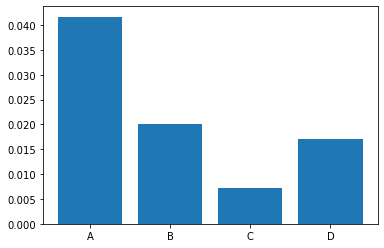

In [236]:
#For visualization 1, I'm using a simple bar chart to make it easy to see the value difference across the queues.

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())
plt.bar(range(len(abandonment_rates)), values, tick_label=names)


In [237]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

In [238]:
service_level = service_level.sort_values("Service Level %", ascending=False)
service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Brent,6,8,75.000000
Amanda,3,5,60.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333
Andy,3,10,30.000000
Joe,2,10,20.000000


<AxesSubplot:xlabel='Rep ID'>

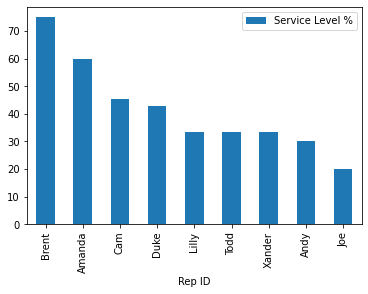

In [239]:
# For visualization 2, I'm using a pandas bar chart to show service level % by rep.
# I sorted by Service Level % to help easily see who is performing well and not as well.
service_level.plot.bar(y="Service Level %")

In [295]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

# NOTE: The "purpose_group" variable is not defined - so this provided code isn't working.
#purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#complaints = purpose_counts["Complaint"].to_dict()
#sales_support = purpose_counts["Sales Support"].to_dict()
#product_support = purpose_counts["Product Support"].to_dict()

In [281]:
# Not the stated visualization code, but pulls the needed data for one.
purpose_group_1 = df.melt(id_vars="Incoming or Outgoing", value_vars="Call Purpose", value_name="Purpose")
purpose_group_counts = purpose_group_1.groupby(["Incoming or Outgoing", "Purpose"])
purpose_group_counts = pd.DataFrame(purpose_group_counts.size().reset_index(name="Count"))
purpose_group_counts

,Incoming or Outgoing,Purpose,Count
0,Incoming,Complaint,51
1,Incoming,Product Support,82
2,Incoming,Sales Support,75
3,Outgoing,Product Support,228
4,Outgoing,Sales Support,123


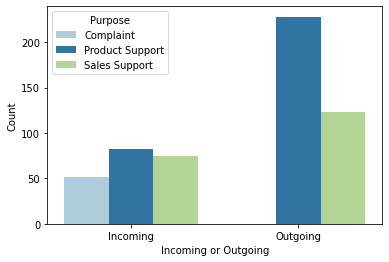

In [294]:
# For visualization 3, I'm using a grouped bar chart to show the number of calls per purpose for incoming and outgoing.
sns.set_palette("Paired")
ax = sns.barplot(x="Incoming or Outgoing", y="Count", hue="Purpose", data=purpose_group_counts)


### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

Because each piece of information was comparing the relative size/percentage, bar charts were useful for all.
For the 3rd visualization, breaking the information out with a hue and key makes it more meainingful.


## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

Because the South branch has less abandoned calls, more ideal wait time calls, and a faster average speed of answer, they appear to be working more efficiently than the North Branch. 

North:
    Avg abandonment: 2.8%
    Calls within 2 secs: 13.4%
    Avg speed of answer: 3.05 seconds
South:
    Avg abandonment: 1.2%
    Calls within 2 secs: 15.2%
    Avg speed of answer: 3.0 seconds



2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

North's statistics for the KPIs are not as good and they have 2 less reps than the South branch. They would probably benefit from additional help.


3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

It would be helpful to have dates for calls to be more certain about removing duplicates. A larger dataset would also probably be beneficial in making sure that these numbers aren't an anomoly. 


## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

<AxesSubplot:xlabel='Time Block'>

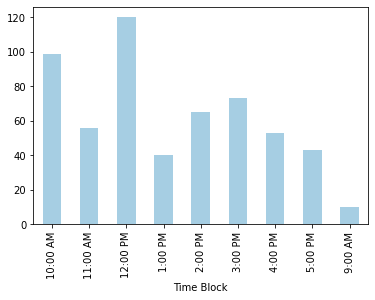

In [317]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
call_times.groupby("Time Block").size().plot(kind = "bar")

# Use groupby and get_group to select which call purpose to plot:
